# MNIST

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Load Dataset

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.astype(np.float32) / 255.0, X_test.astype(np.float32) / 225.0


In [3]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (60000, 28, 28)
X_test.shape = (10000, 28, 28)


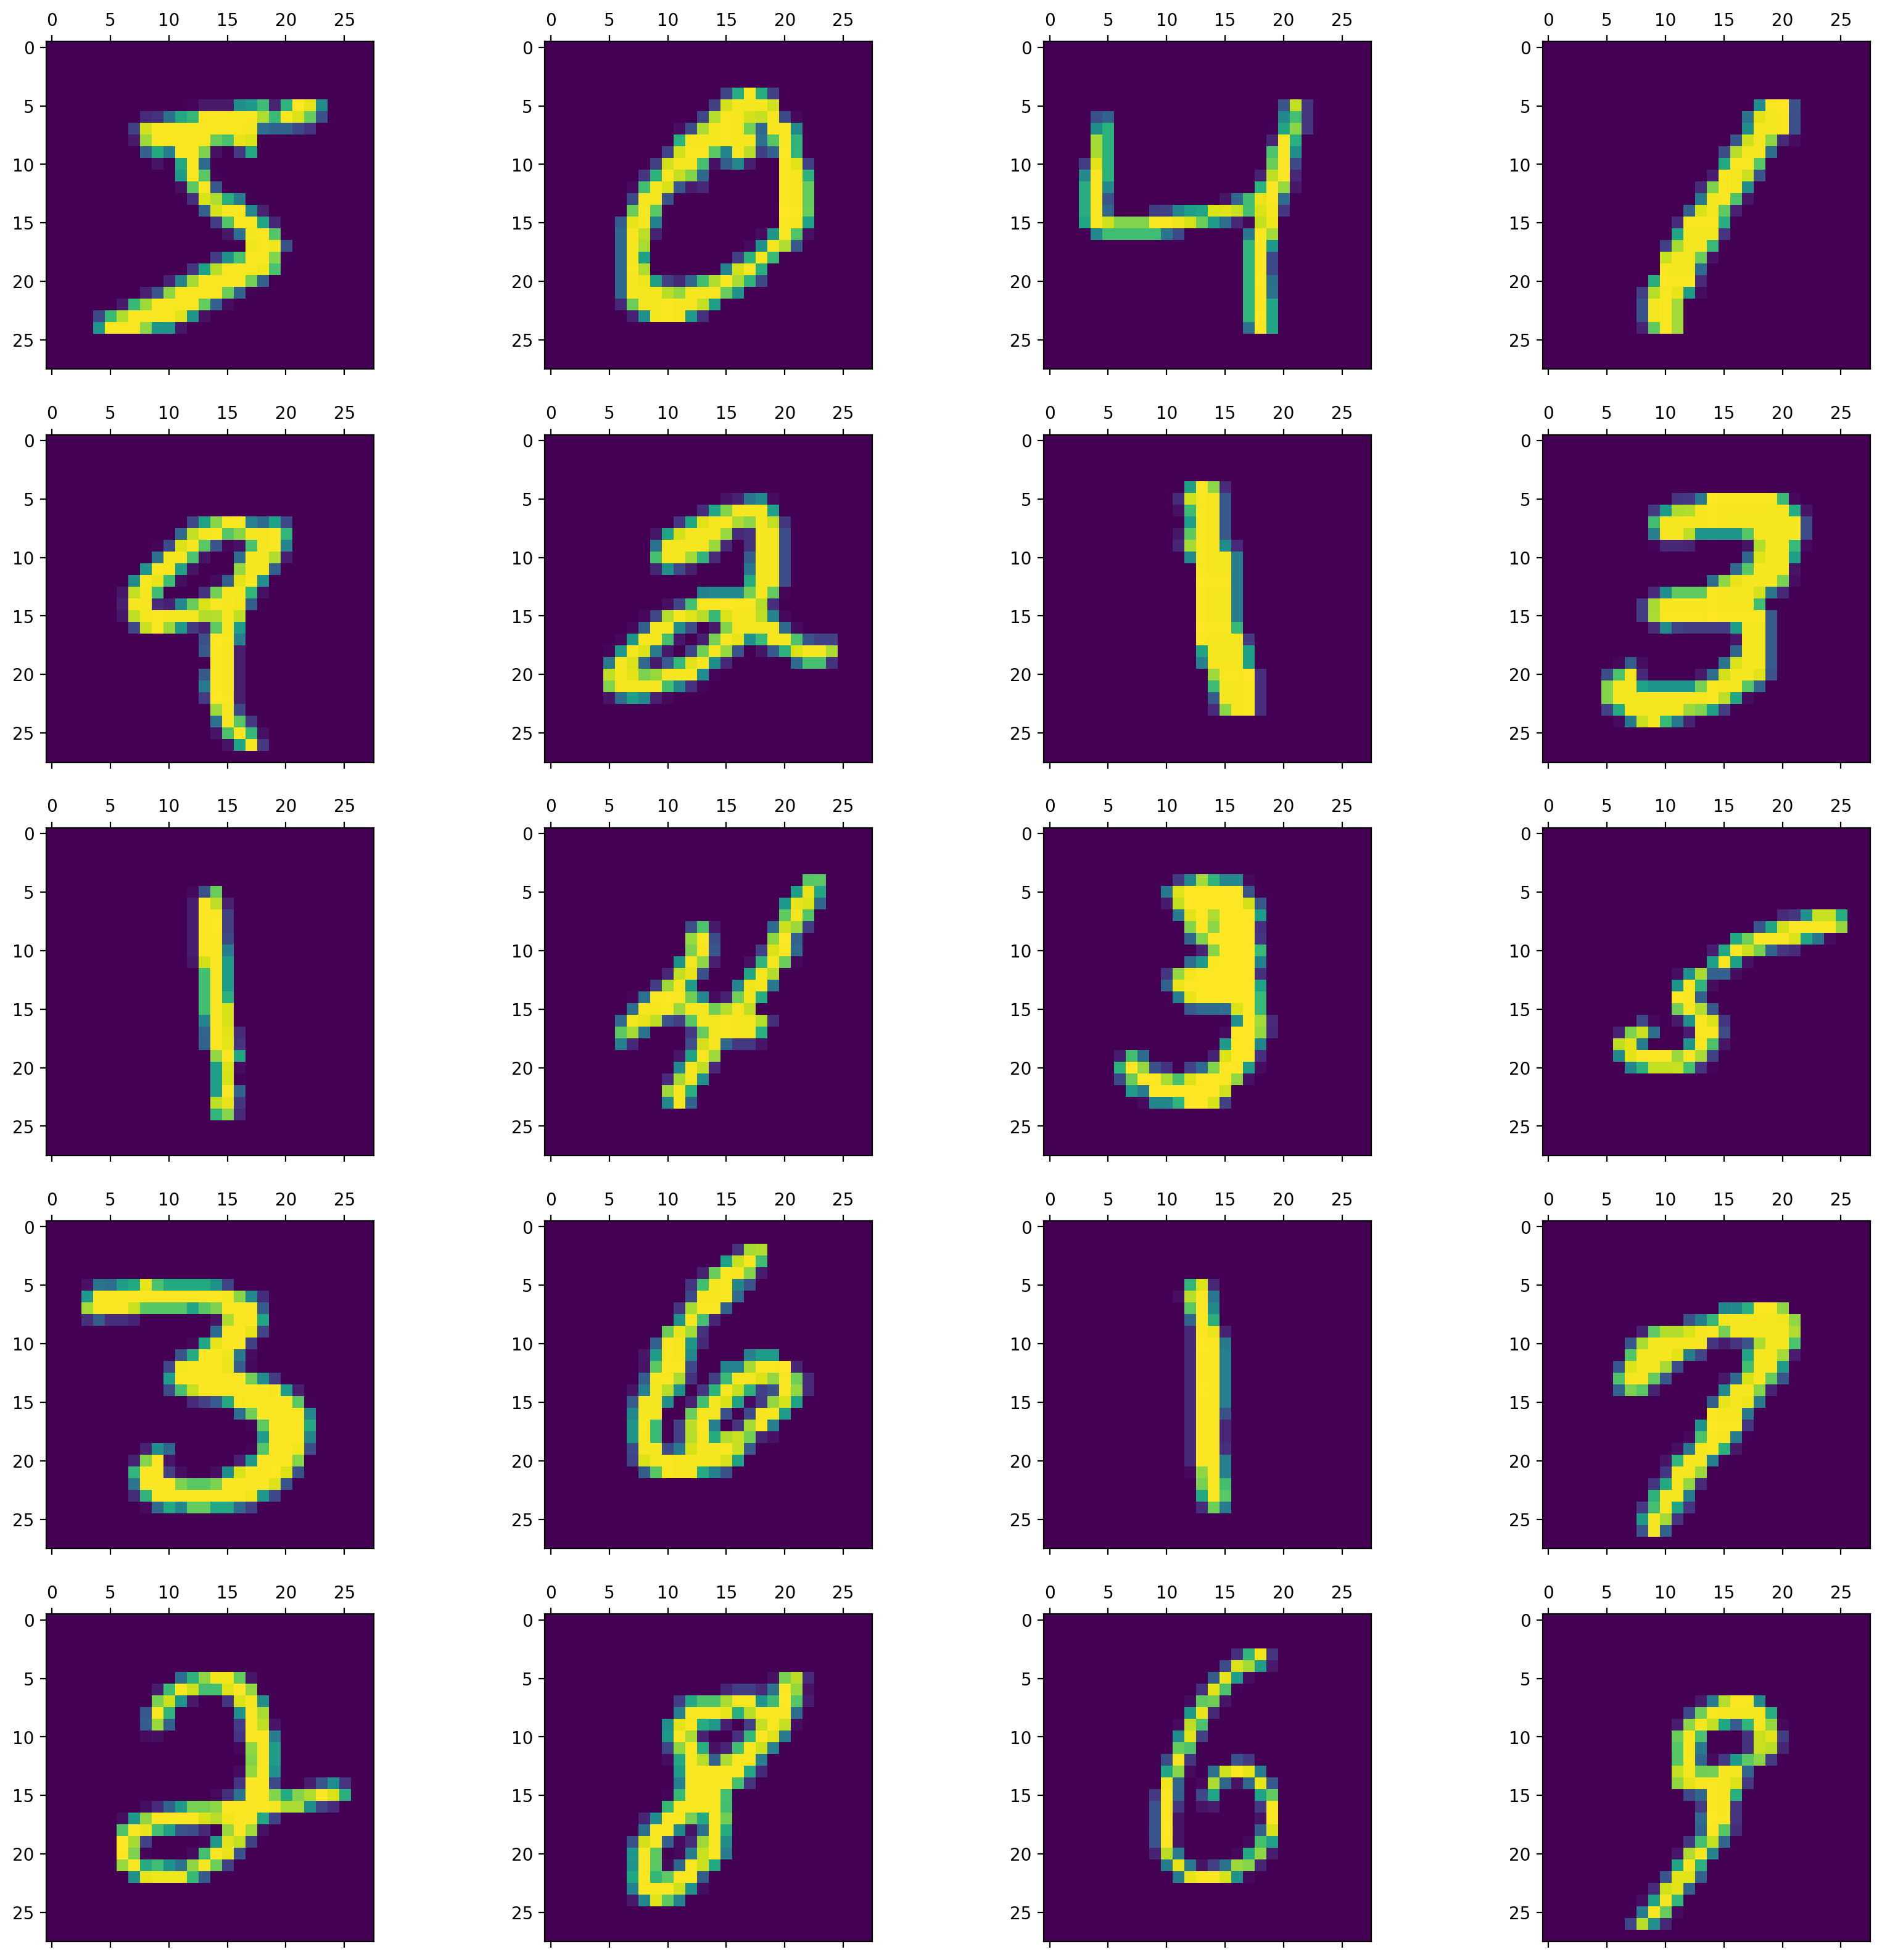

In [4]:
n = 20
fig, ax = plt.subplots(5, 4, figsize=(20, 20))
ax = ax.ravel()

for e in range(n):
    ax[e].matshow(X_train[e].reshape(28, -1))#, cmap='gray')

# Building model

In [5]:
## Clearing session
tf.keras.backend.clear_session()

## making model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', name='hidden1'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='output')
])

# Compile model

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Fitting model

In [8]:
tf_hist = model.fit(X_train, y_train, validation_split=.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 1s 754us/step - loss: 0.2697 - accuracy: 0.9230 - val_loss: 0.1269 - val_accuracy: 0.9643
Epoch 2/20
1688/1688 [==============================] - 1s 680us/step - loss: 0.1175 - accuracy: 0.9651 - val_loss: 0.0929 - val_accuracy: 0.9718
Epoch 3/20
1688/1688 [==============================] - 1s 786us/step - loss: 0.0800 - accuracy: 0.9760 - val_loss: 0.0835 - val_accuracy: 0.9755
Epoch 4/20
1688/1688 [==============================] - 1s 819us/step - loss: 0.0596 - accuracy: 0.9819 - val_loss: 0.0774 - val_accuracy: 0.9767
Epoch 5/20
1688/1688 [==============================] - 1s 722us/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0734 - val_accuracy: 0.9793
Epoch 6/20
1688/1688 [==============================] - 1s 685us/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0799 - val_accuracy: 0.9767
Epoch 7/20
1688/1688 [==============================] - 1s 699us/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0813 -

# Plotting result

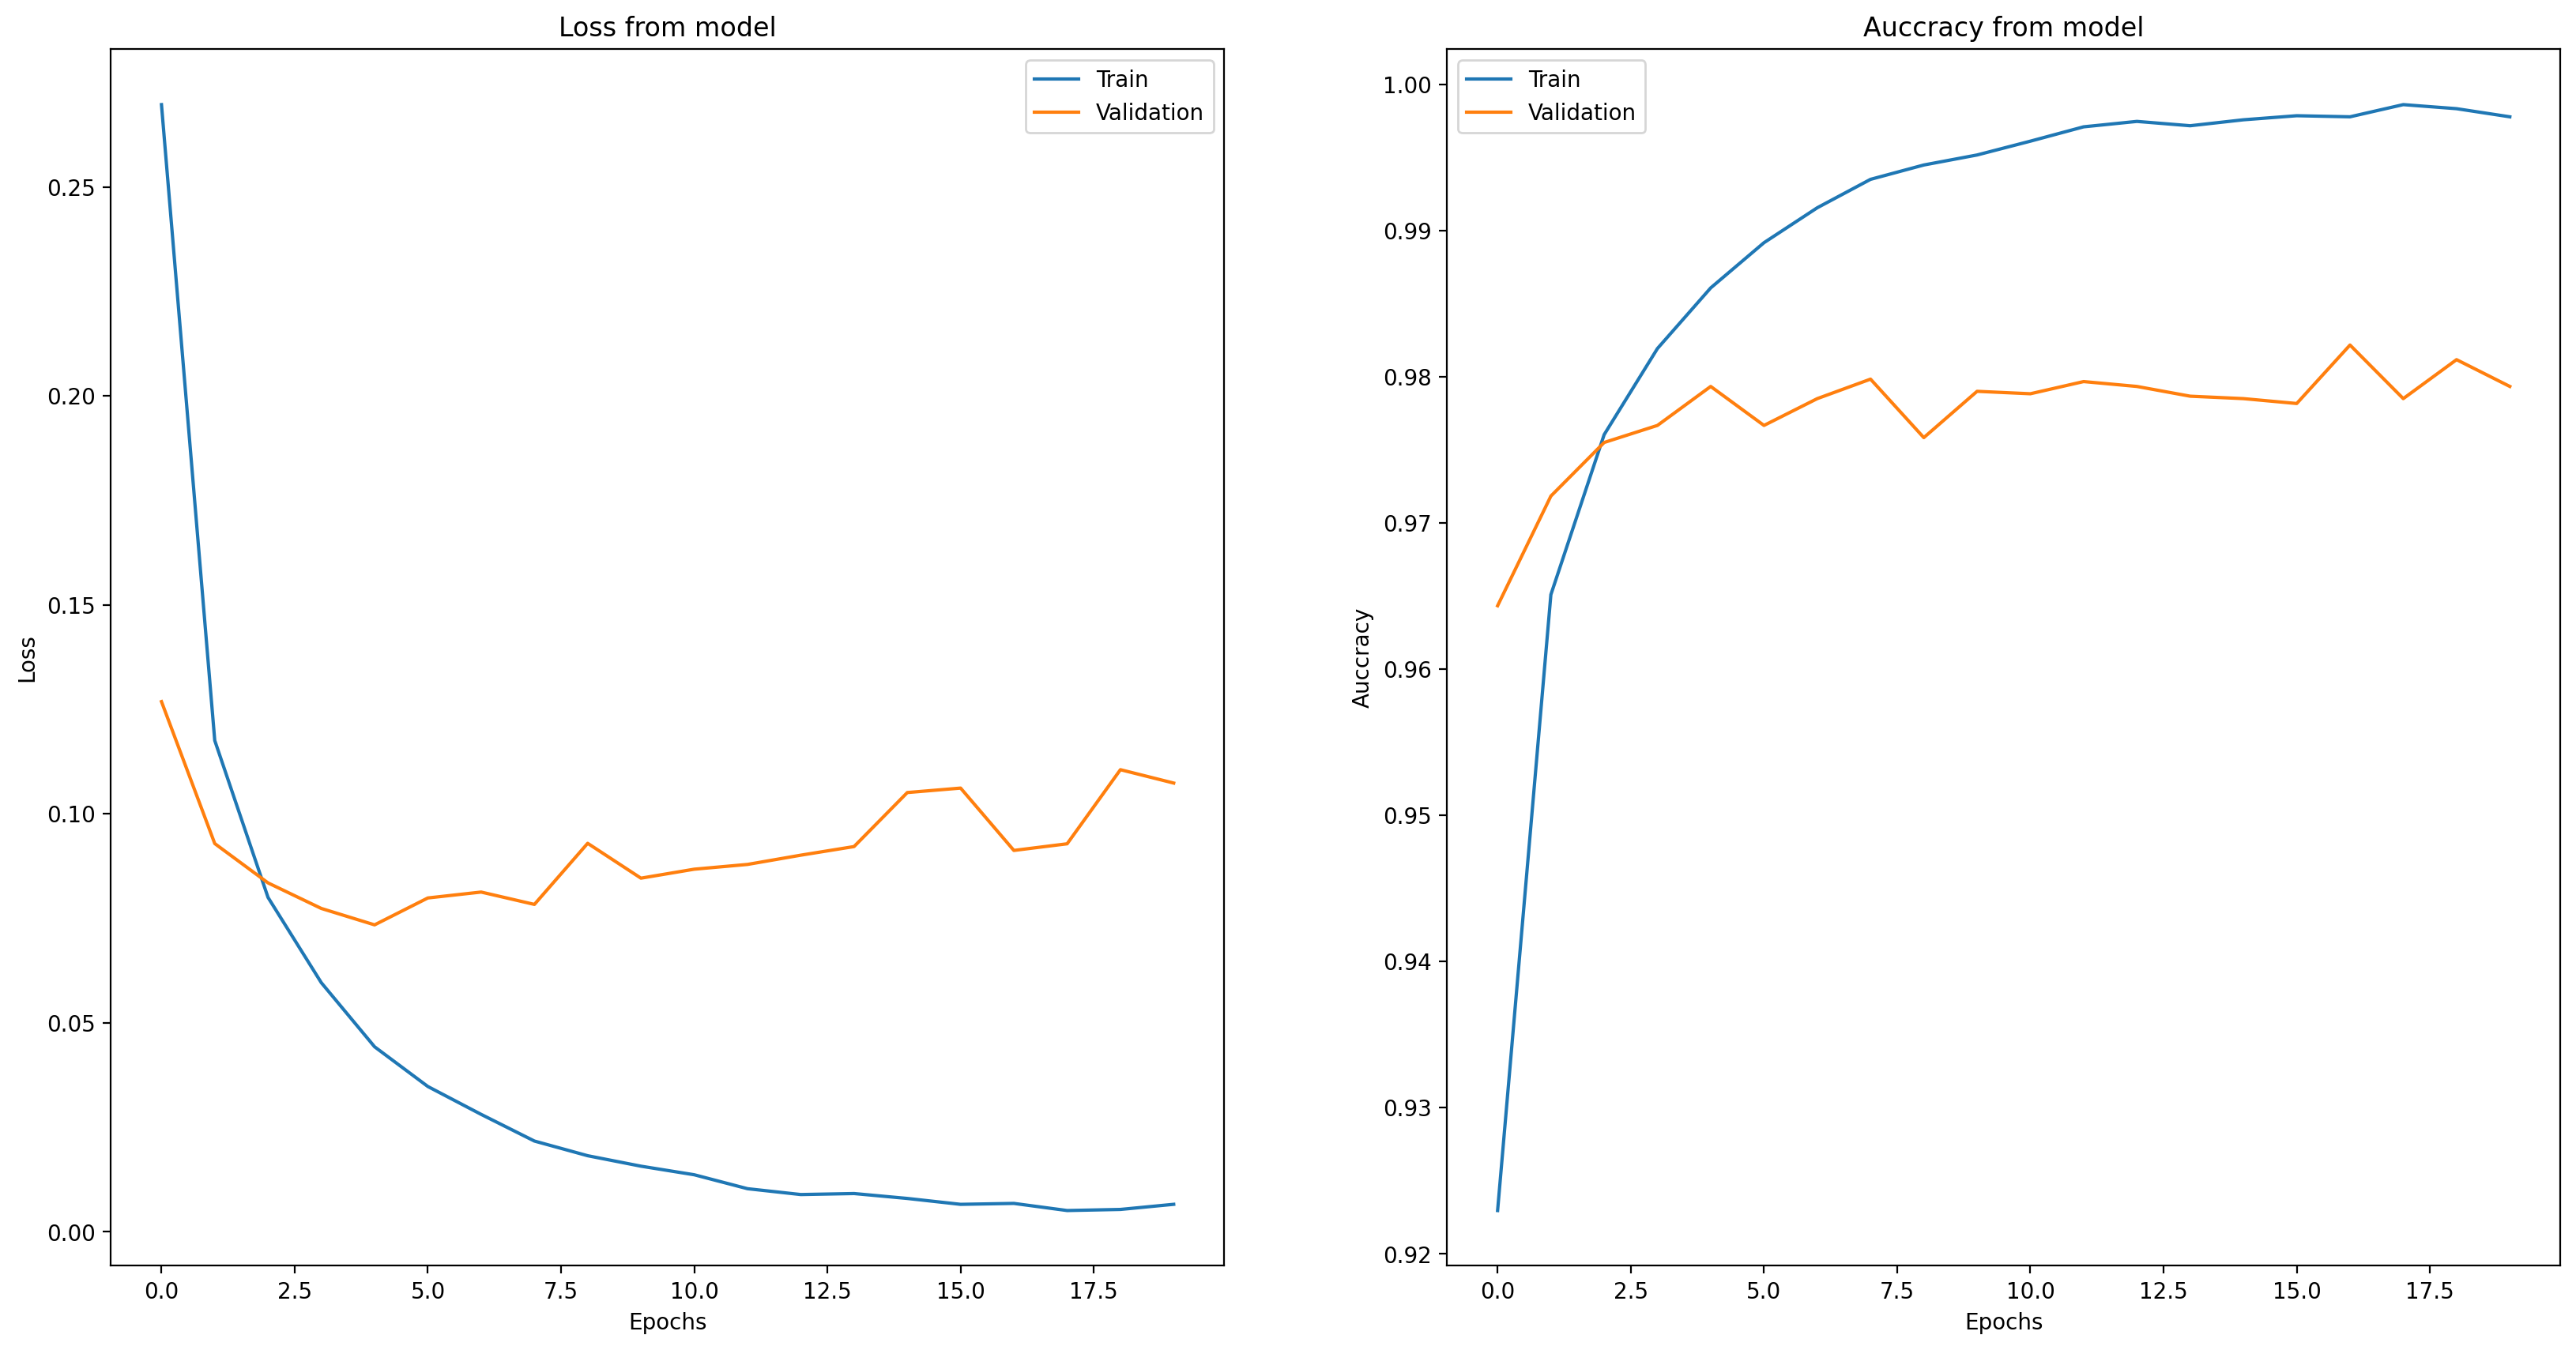

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(tf_hist.history['loss'], label='Train')
ax[0].plot(tf_hist.history['val_loss'], label='Validation')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss from model')
ax[0].legend()

ax[1].plot(tf_hist.history['accuracy'], label='Train')
ax[1].plot(tf_hist.history['val_accuracy'], label='Validation')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Auccracy')
ax[1].set_title('Auccracy from model')
ax[1].legend();

# Evaluate

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 459us/step - loss: 0.1144 - accuracy: 0.9787


[0.11442776769399643, 0.9786999821662903]

In [13]:
## predict
y_hat = model(X_test)
y_hat

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[9.3292421e-16, 1.1105431e-18, 1.7115964e-14, ..., 1.0000000e+00,
        4.0144953e-15, 3.6851433e-12],
       [1.8937894e-16, 4.6333623e-12, 1.0000000e+00, ..., 2.9862650e-25,
        4.4008417e-12, 1.0551989e-24],
       [3.1083358e-13, 9.9999988e-01, 4.0338840e-11, ..., 6.2652695e-08,
        1.1668635e-08, 2.8878533e-13],
       ...,
       [3.8809299e-31, 7.9212106e-26, 1.5304220e-25, ..., 6.1359626e-15,
        1.1954692e-16, 2.8265501e-11],
       [6.1046328e-22, 6.8374607e-23, 1.7956926e-25, ..., 3.3292017e-14,
        2.3101720e-08, 1.0914167e-19],
       [2.1837536e-09, 1.6580777e-19, 3.9000958e-13, ..., 2.0219989e-22,
        2.5278629e-18, 6.9458909e-19]], dtype=float32)>

In [57]:
## result form prediction
y_hat_re = np.argmax(y_hat, axis=1)
y_hat_re[0]

7

In [59]:
yp = y_hat.numpy()[0]
yp

array([9.3292421e-16, 1.1105431e-18, 1.7115964e-14, 3.0369229e-09,
       3.2959968e-27, 4.1891843e-16, 6.7422172e-25, 1.0000000e+00,
       4.0144953e-15, 3.6851433e-12], dtype=float32)

In [33]:
list(range(yp.shape[0]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

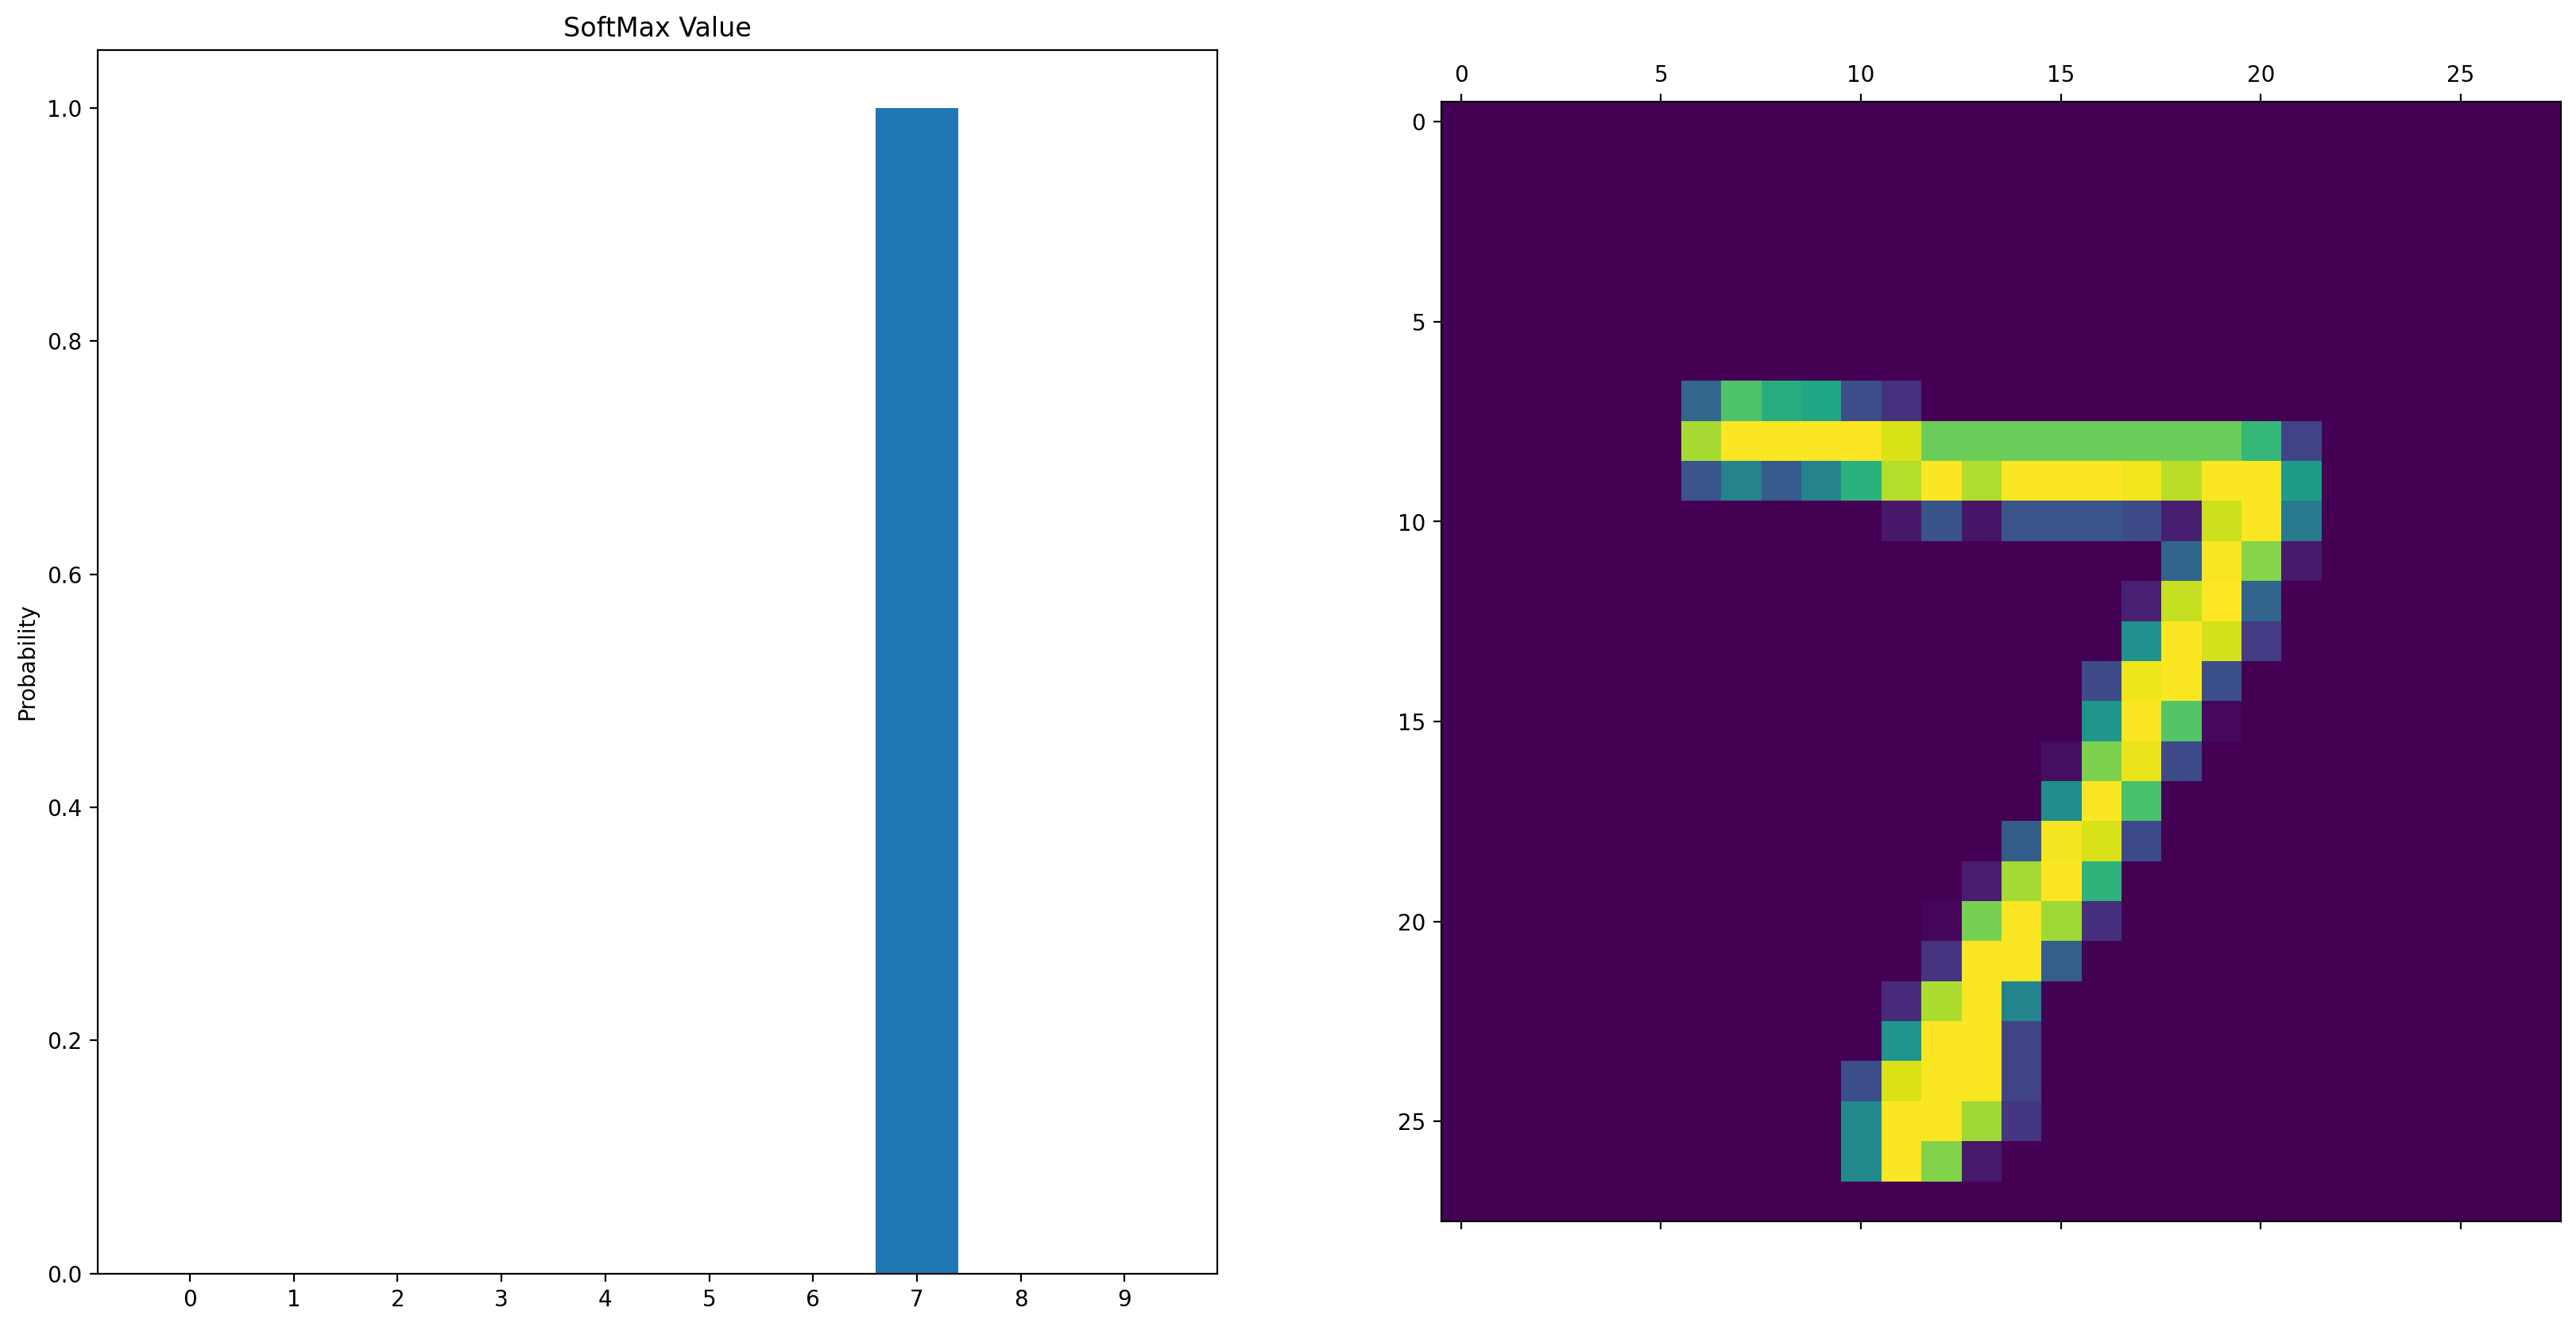

In [40]:
x_ticklabel = [i for i in range(10)]
yp = y_hat.numpy()[0]
xp = list(range(yp.shape[0]))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].bar(xp, yp)
ax[0].set_xticks(x_ticklabel)
ax[0].set_xticklabels(x_ticklabel)
ax[0].set_title('SoftMax Value')
ax[0].set_ylabel('Probability')

ax[1].matshow(X_test[0])

In [48]:
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

## convert from probability to label
y_pred = tf.math.argmax(y_pred_tf, axis=1).numpy()

loc = y_test != y_pred
print(f'Miss Classifed = {loc.sum()}')

Miss Classifed = 213


In [50]:
X_test[loc].shape

(213, 28, 28)

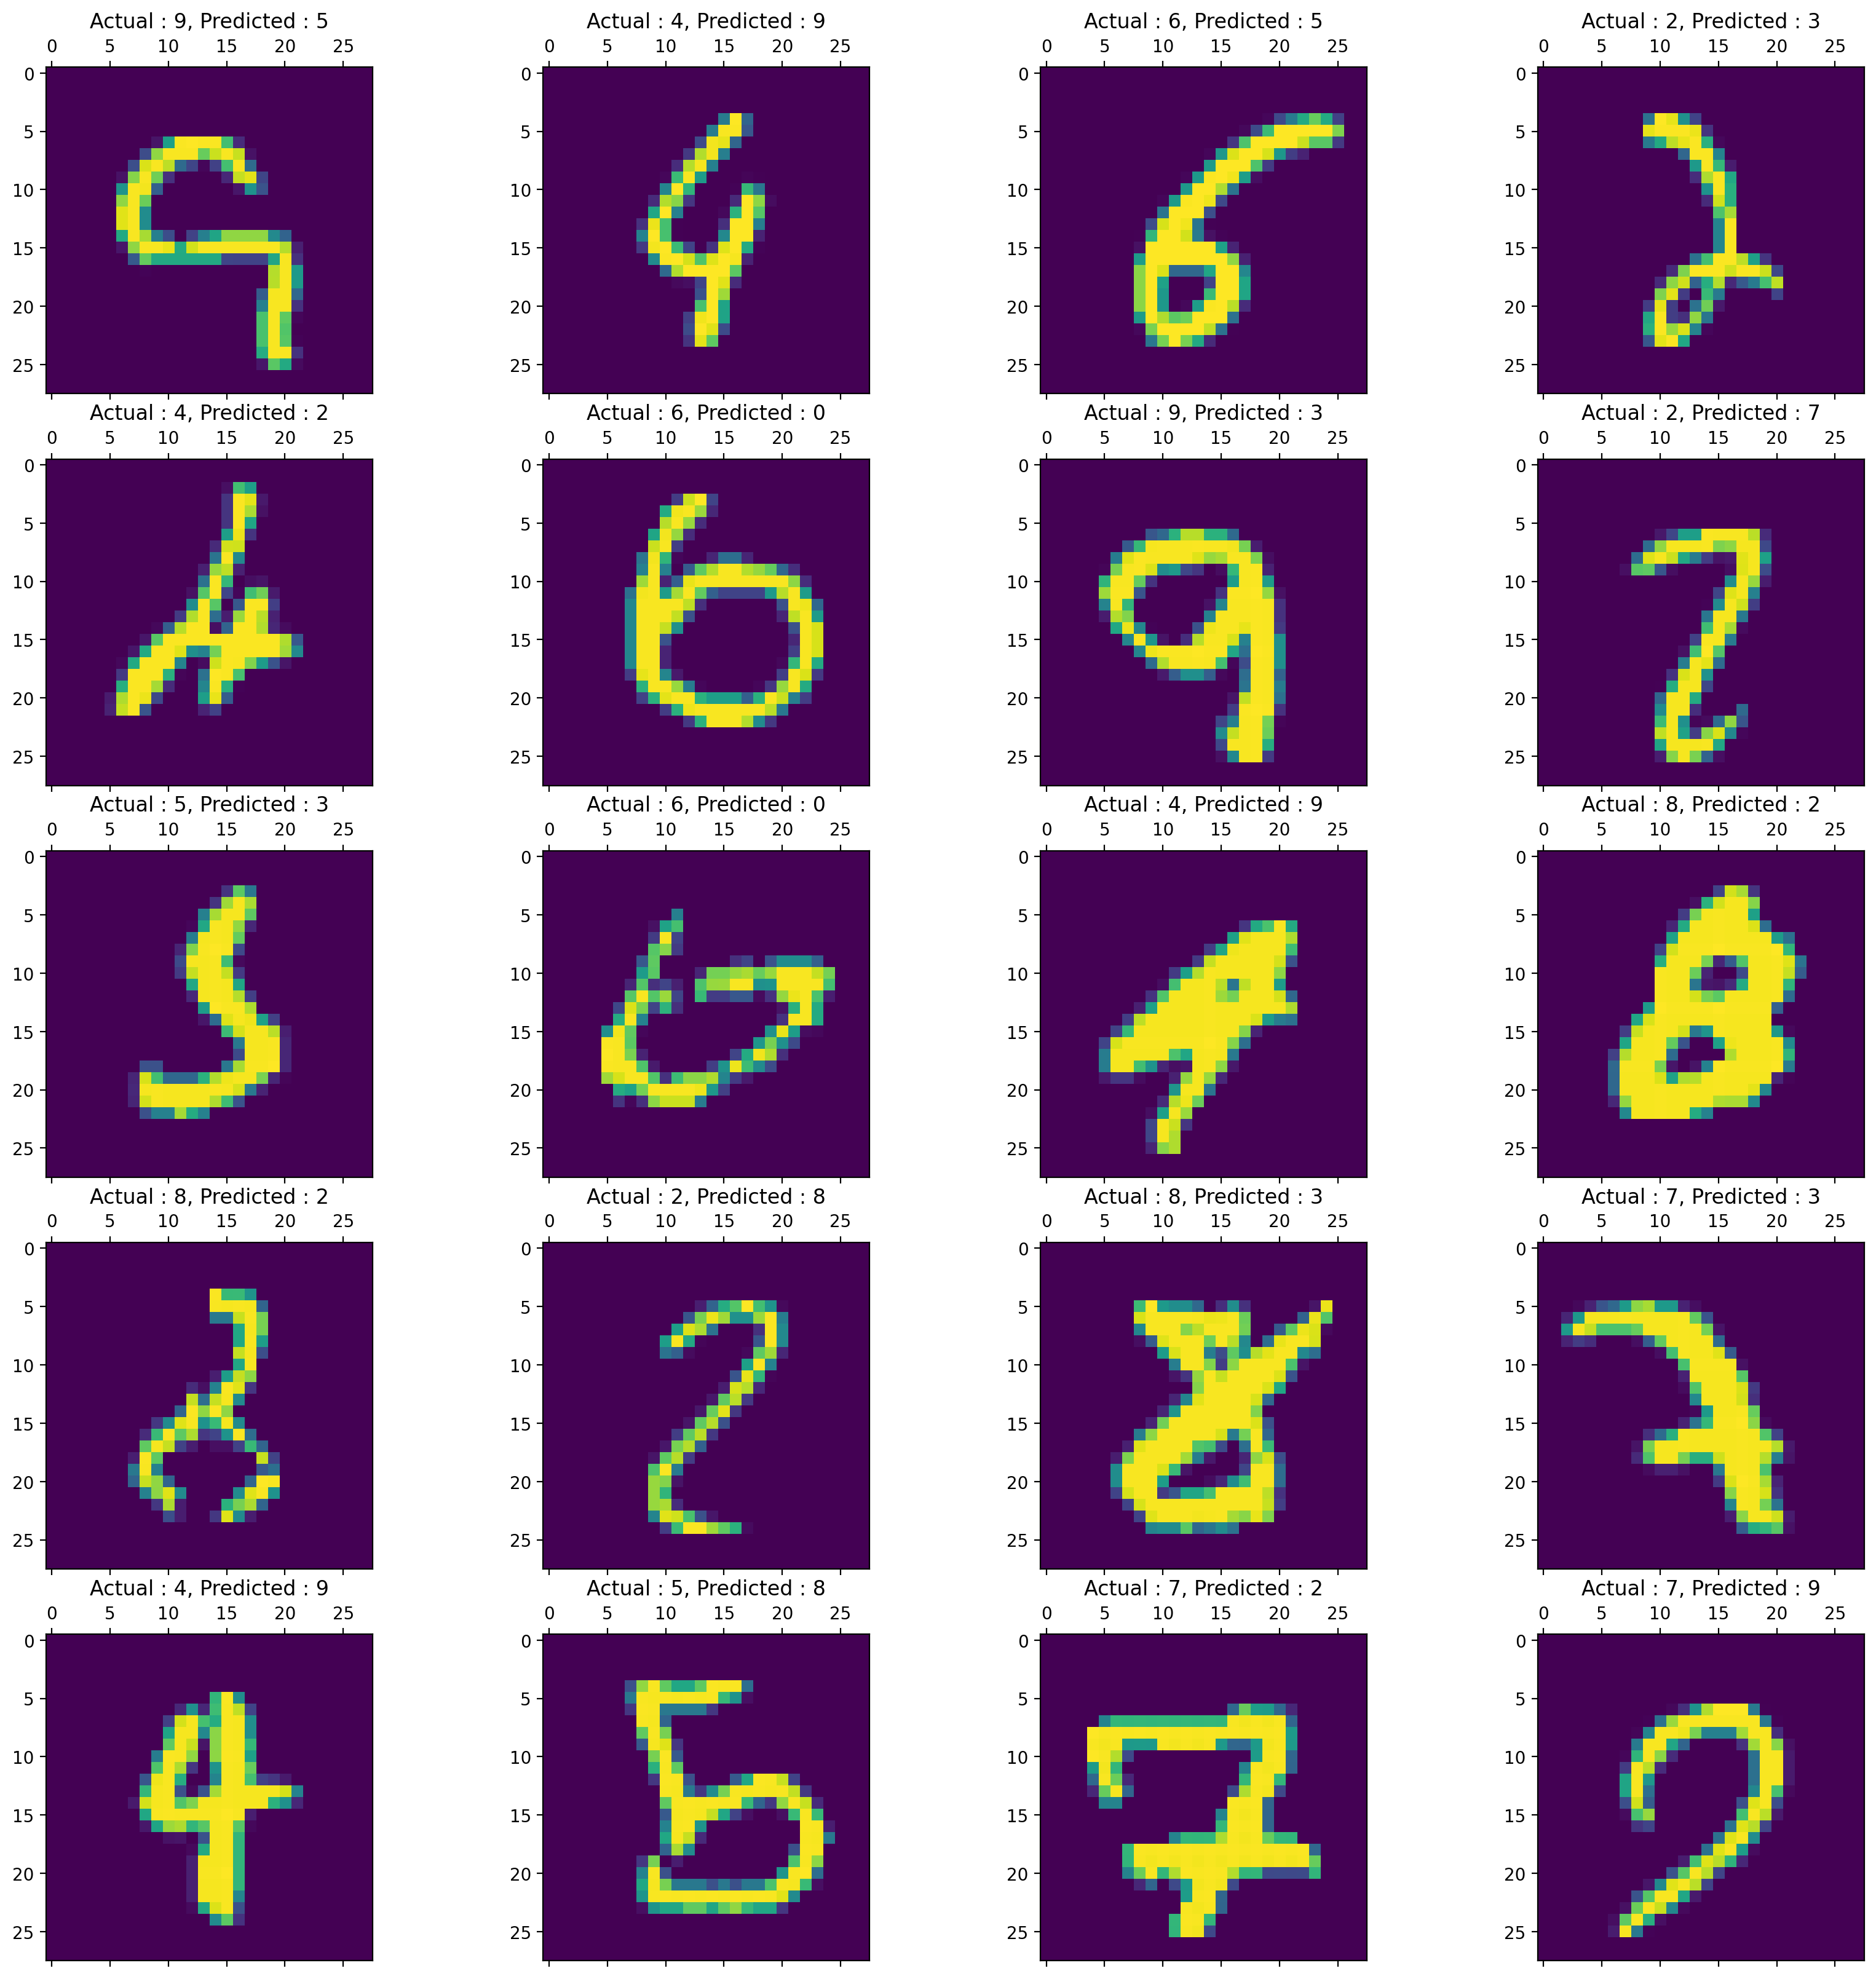

In [55]:
## ploting some of miss classified
n = 20
fig, ax = plt.subplots(5, 4, figsize=(20, 20))
ax = ax.ravel()

for i in range(n):
    ax[i].matshow(X_test[loc][i])
    ax[i].set_title(f'Actual : {y_test[loc][i]}, Predicted : {y_pred[loc][i]}')